(0.18744903802871704,
 1.8839265704154968,
 0.08259722739458084,
 1.9237743005156518)

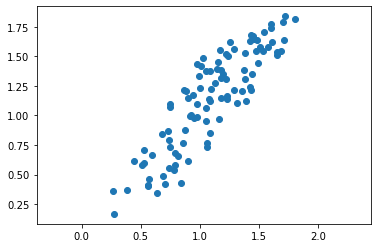

In [164]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import random
seed = random.randint(1, 309)
# make up some data for x
random.seed(seed)
torch.manual_seed(seed)
np.random.seed(seed)
D = 2
x= torch.rand(100,D)
x[:,0] = x[:,0] + x[:,1]
x[:,1] = 0.5*x[:,0] + x[:,1]
plt.scatter(x[:,0],x[:,1])
plt.axis('equal')

In [165]:
random.seed(seed)
torch.manual_seed(seed)
np.random.seed(seed)
wEncoder = torch.randn(D,1, requires_grad=True)
wDecoder = torch.randn(1,D, requires_grad=True)
bEncoder = torch.randn(1, requires_grad=True)
bDecoder = torch.randn(1,D, requires_grad=True)


In [166]:
def encode(x,wEncoder,bEncoder):
    return wEncoder[0]*x[:,0] + wEncoder[1]*x[:,1] + bEncoder

In [167]:
def decode(z,wDecoder,bDecoder):
    return wDecoder*z.reshape([100,1])  + bDecoder


In [168]:
from sklearn.metrics import mean_squared_error
def mse(decoded,x):
    decoded = decoded.detach().numpy()
    x = x.detach().numpy()
    return mean_squared_error(decoded,x)

In [169]:
opt = torch.optim.SGD([wEncoder,wDecoder,bEncoder,bDecoder], lr=0.01)


In [170]:
from torch import nn
LIMIT = 50
NTESTPOINTS = 100
winit = LIMIT * (2*torch.rand(NTESTPOINTS,2)-1) 
STEPS = 1000
saved = np.ones((STEPS,len(winit),2))
lossF = nn.MSELoss()
loss = []
st = []
detached = []
for t in range(STEPS):
  st.append(t)
  detached.append(x.detach().numpy())
  opt.zero_grad()
  decoded = decode(encode(x,wEncoder,bEncoder),wDecoder,bDecoder)
  y = lossF(decoded,x)
  loss.append(mse(decoded,x))
  saved[t,:,:] = y.detach().numpy()
  y.backward(torch.ones_like(y))
  opt.step()

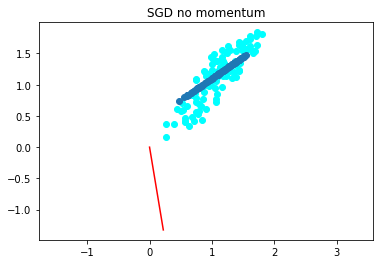

In [171]:

xRecon = decode(encode(x,wEncoder,bEncoder),wDecoder,bDecoder)
plt.scatter(x[:,0],x[:,1],color='cyan');
plt.scatter(xRecon.detach()[:,0],xRecon.detach()[:,1]);
plt.plot([0,wEncoder[0,0].detach().numpy()], [0,wEncoder[1,0].detach().numpy()],'-r');
plt.axis('equal')
plt.title("SGD no momentum")
plt.show()

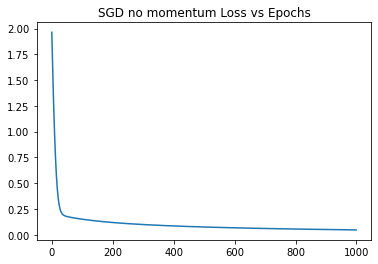

In [172]:
plt.plot(st,loss)
plt.title("SGD no momentum Loss vs Epochs")
plt.show()

In [173]:
random.seed(seed)
torch.manual_seed(seed)
np.random.seed(seed)
wEncoderM = torch.randn(D,1, requires_grad=True)
wDecoderM = torch.randn(1,D, requires_grad=True)
bEncoderM = torch.randn(1, requires_grad=True)
bDecoderM = torch.randn(1,D, requires_grad=True)

In [174]:
optM = torch.optim.SGD([wEncoderM,wDecoderM,bEncoderM,bDecoderM],momentum=0.9, lr=0.01)

In [175]:
from torch import nn
LIMIT = 50
NTESTPOINTS = 100
winit = LIMIT * (2*torch.rand(NTESTPOINTS,2)-1) 
STEPS = 1000
saved = np.ones((STEPS,len(winit),2))
lossF = nn.MSELoss()
loss = []
st = []
detached = []
for t in range(STEPS):
  st.append(t)
  detached.append(x.detach().numpy())
  optM.zero_grad()
  decoded = decode(encode(x,wEncoderM,bEncoderM),wDecoderM,bDecoderM)
  y = lossF(decoded,x)
  loss.append(mse(decoded,x))
  saved[t,:,:] = y.detach().numpy()
  y.backward(torch.ones_like(y))
  optM.step()

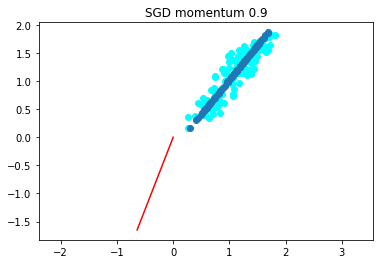

In [176]:
xRecon = decode(encode(x,wEncoderM,bEncoderM),wDecoderM,bDecoderM)
plt.scatter(x[:,0],x[:,1],color='cyan');
plt.scatter(xRecon.detach()[:,0],xRecon.detach()[:,1]);
plt.plot([0,wEncoderM[0,0].detach().numpy()], [0,wEncoderM[1,0].detach().numpy()],'-r');
plt.axis('equal')
plt.title("SGD momentum 0.9")
plt.show()

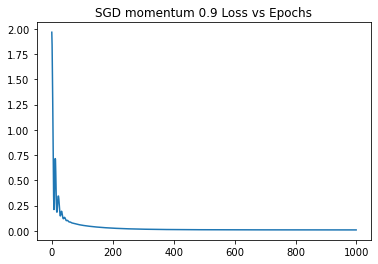

In [177]:
plt.plot(st,loss)
plt.title("SGD momentum 0.9 Loss vs Epochs")
plt.show()

In [178]:
random.seed(seed)
torch.manual_seed(seed)
np.random.seed(seed)
wEncoderRMS = torch.randn(D,1, requires_grad=True)
wDecoderRMS = torch.randn(1,D, requires_grad=True)
bEncoderRMS = torch.randn(1, requires_grad=True)
bDecoderRMS = torch.randn(1,D, requires_grad=True)

In [179]:
optRMS = torch.optim.RMSprop([wEncoderRMS,wDecoderRMS,bEncoderRMS,bDecoderRMS],momentum=0.9, lr=0.01)

In [180]:
LIMIT = 50
NTESTPOINTS = 100
winit = LIMIT * (2*torch.rand(NTESTPOINTS,2)-1) 
STEPS = 1000
saved = np.ones((STEPS,len(winit),2))
lossF = nn.MSELoss()
loss = []
st = []
detached = []
for t in range(STEPS):
  st.append(t)
  detached.append(x.detach().numpy())
  optRMS.zero_grad()
  decoded = decode(encode(x,wEncoderRMS,bEncoderRMS),wDecoderRMS,bDecoderRMS)
  y = lossF(decoded,x)
  loss.append(mse(decoded,x))
  saved[t,:,:] = y.detach().numpy()
  y.backward(torch.ones_like(y))
  optRMS.step()

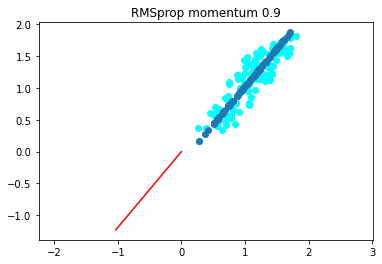

In [181]:
xRecon = decode(encode(x,wEncoderRMS,bEncoderRMS),wDecoderRMS,bDecoderRMS)
plt.scatter(x[:,0],x[:,1],color='cyan');
plt.scatter(xRecon.detach()[:,0],xRecon.detach()[:,1]);
plt.plot([0,wEncoderRMS[0,0].detach().numpy()], [0,wEncoderRMS[1,0].detach().numpy()],'-r');
plt.axis('equal')
plt.title("RMSprop momentum 0.9")
plt.show()

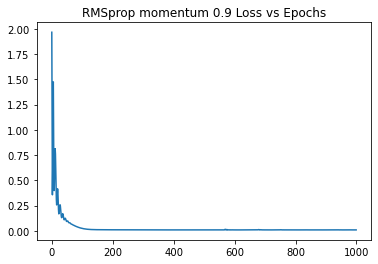

In [182]:
plt.plot(st,loss)
plt.title("RMSprop momentum 0.9 Loss vs Epochs")
plt.show()

In [183]:
print("RMSprop")
print(wEncoderRMS/wDecoderRMS)

RMSprop
tensor([[2.5970, 2.1813],
        [3.0951, 2.5996]], grad_fn=<DivBackward0>)


In [184]:
print("SGD momentum")
print(wEncoderM/wDecoderM)

SGD momentum
tensor([[1.7082, 1.3907],
        [4.3906, 3.5744]], grad_fn=<DivBackward0>)


In [186]:
print("SGD no momentum")
print(wEncoder/wDecoder)

SGD no momentum
tensor([[-0.3896, -0.5654],
        [ 2.3440,  3.4020]], grad_fn=<DivBackward0>)


The parameters start at random and is set to require a gradient and is then optimized as the steps progress. This is why the loss starts high on all the Loss vs Epochs graphs and quickly goes near 0 as the parameters are optimized and help to encode and decode more accurately. We can see the new reconstructed x with the optimised parameters by the dark blue line in the scatter plots which shows the model being optimized to show a linear equation showing the average of all the x's before encoding/decoding. The cyan points show all the original x values before encoding and decoding and so the closer the dark blue linear line is to an accurate averge the better and more optimized the parameters have been. The red line shows the optimised wEncoder which would change each time it is run as it starts from a random start but should show the gradient of the optimized weight parameter for encoding. 

Adding momentum seems to improve the accuracy as the loss function is able to get closer to zero quicker than without momentum. The dark blue line also seems more accurate with the optimized parameters using momentum than without as seem with the dark blue line in the first scatterplot seeming as a less accurate average function than that of the other 2 with moemntum. RMSprop and SGD with momentum also seem to have very similar results with a slight rise in inaccuracy at towards the start with the loss vs epochs graph however quickly going near 0 as it converges faster and better and also with lower MSE than without momentum. 

The weight for the Encoder (shown with red line) also seems to be positive for SGD with momentum and RMSprop however it is negative for SGD without momentum. These different weights can be seen with the weight ratios with the Encoder and Decoder weights with SGD no momentum having some negative ratios which show the difference in the weights which cause it to be neagtive.